In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from IPython.display import HTML, display

# Add the script's directory to the Python path
script_dir = r'D:\Projects\Python\bank-app-reviews-analysis\src\analysis'
sys.path.append(script_dir)

# Verify the script exists
script_path = os.path.join(script_dir, 'analyze_reviews_from_db.py')
if not os.path.isfile(script_path):
    print(f"Error: Script not found at {script_path}")
    raise FileNotFoundError(f"Script not found: {script_path}")

# Import and reload the module
try:
    import analyze_reviews_from_db
    importlib.reload(analyze_reviews_from_db)
    print("Module attributes:", dir(analyze_reviews_from_db))
    if not hasattr(analyze_reviews_from_db, 'load_data'):
        print("Error: 'load_data' not found in module")
        raise AttributeError("Module missing 'load_data'")
except ImportError as e:
    print(f"ImportError: {e}")
    raise
except AttributeError as e:
    print(f"AttributeError: {e}")
    raise

# Ensure output directory exists
os.makedirs("outputs", exist_ok=True)

Module attributes: ['Color', 'Counter', 'SentimentIntensityAnalyzer', 'WordCloud', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'analyzer', 'canvas', 'check_bias', 'clean_and_tokenize', 'cx_Oracle', 'extract_keywords', 'generate_report', 'generate_wordcloud', 'letter', 'load_data', 'main', 'nlp', 'nltk', 'os', 'pd', 'plot_rating_distribution', 'plot_sentiment_distribution', 'plot_sentiment_trend', 'plt', 'process_data', 're', 'sns', 'spacy', 'stop_words', 'stopwords', 'suggest_improvements', 'summarize_insights', 'text_sentiment']


## Load Data



In [2]:
print("📥 Loading data...")
try:
    df = analyze_reviews_from_db.load_data()
    if df.empty:
        print("⚠️ Warning: No data loaded. Exiting.")
    else:
        display(df.head())
except AttributeError as e:
    print(f"AttributeError: {e}. Check if 'load_data' exists in analyze_reviews_from_db.py")
    raise
except Exception as e:
    print(f"Unexpected error: {e}")
    raise

📥 Loading data...
DataFrame columns: ['REVIEW_ID', 'REVIEW', 'RATING', 'REVIEW_DATE', 'BANK_NAME', 'SOURCE']
DataFrame shape: (815, 6)


REVIEW_ID  \
0  c1698da217f8f1f69ec3f269f2adaed3   
1  07bec0f87319f8e9e6541da2883b2916   
2  77db45e9bb9e610a42cd16c8560ce6fd   
3  2c15634273c8f9922f7a870ce877a8fc   
4  e8efe612c2b176fef3efdcf7955e2a9d   

                                              REVIEW  RATING REVIEW_DATE  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
1                        what is this app problem???       1  2025-06-05   
2       the app is proactive and a good connections.       5  2025-06-05   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05   
4                                     not functional       1  2025-06-05   

                     BANK_NAME       SOURCE  
0  Commercial Bank of Ethiopia  Google Play  
1  Commercial Bank of Ethiopia  Google Play  
2  Commercial Bank of Ethiopia  Google Play  
3  Commercial Bank of Ethiopia  Google Play  
4  Commercial Bank of Ethiopia  Google Play

## Process Data



In [11]:
print("🔄 Processing data...")
df = analyze_reviews_from_db.process_data(df)
if not df.empty:
    display(df.head())

🔄 Processing data...
⚠️ Error: Missing columns in DataFrame: ['REVIEW_DATE', 'RATING', 'REVIEW', 'BANK_NAME']


review_id  \
0  c1698da217f8f1f69ec3f269f2adaed3   
1  07bec0f87319f8e9e6541da2883b2916   
2  77db45e9bb9e610a42cd16c8560ce6fd   
3  2c15634273c8f9922f7a870ce877a8fc   
4  e8efe612c2b176fef3efdcf7955e2a9d   

                                              review  rating review_date  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
1                        what is this app problem???       1  2025-06-05   
2       the app is proactive and a good connections.       5  2025-06-05   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05   
4                                     not functional       1  2025-06-05   

                     bank_name       source sentiment_rating sentiment_text  
0  Commercial Bank of Ethiopia  Google Play         positive       positive  
1  Commercial Bank of Ethiopia  Google Play         negative       negative  
2  Commercial Bank of Ethiopia  Google Play         positive       positive  
3  Commercial Bank of Ethiopia  Google Play          neutral        neutral  
4  Commercial Bank of Ethiopia  Google Play         negative        neutral

 ## Bias Check



In [16]:
print("📉 Checking for bias...")
bias_report = analyze_reviews_from_db.check_bias(df)
print(bias_report)

📉 Checking for bias...

📉 Sentiment Bias Check:
Positive: 62.70%
Neutral: 6.01%
Negative: 31.29%



## Generate Visualizations

📊 Generating visualizations...


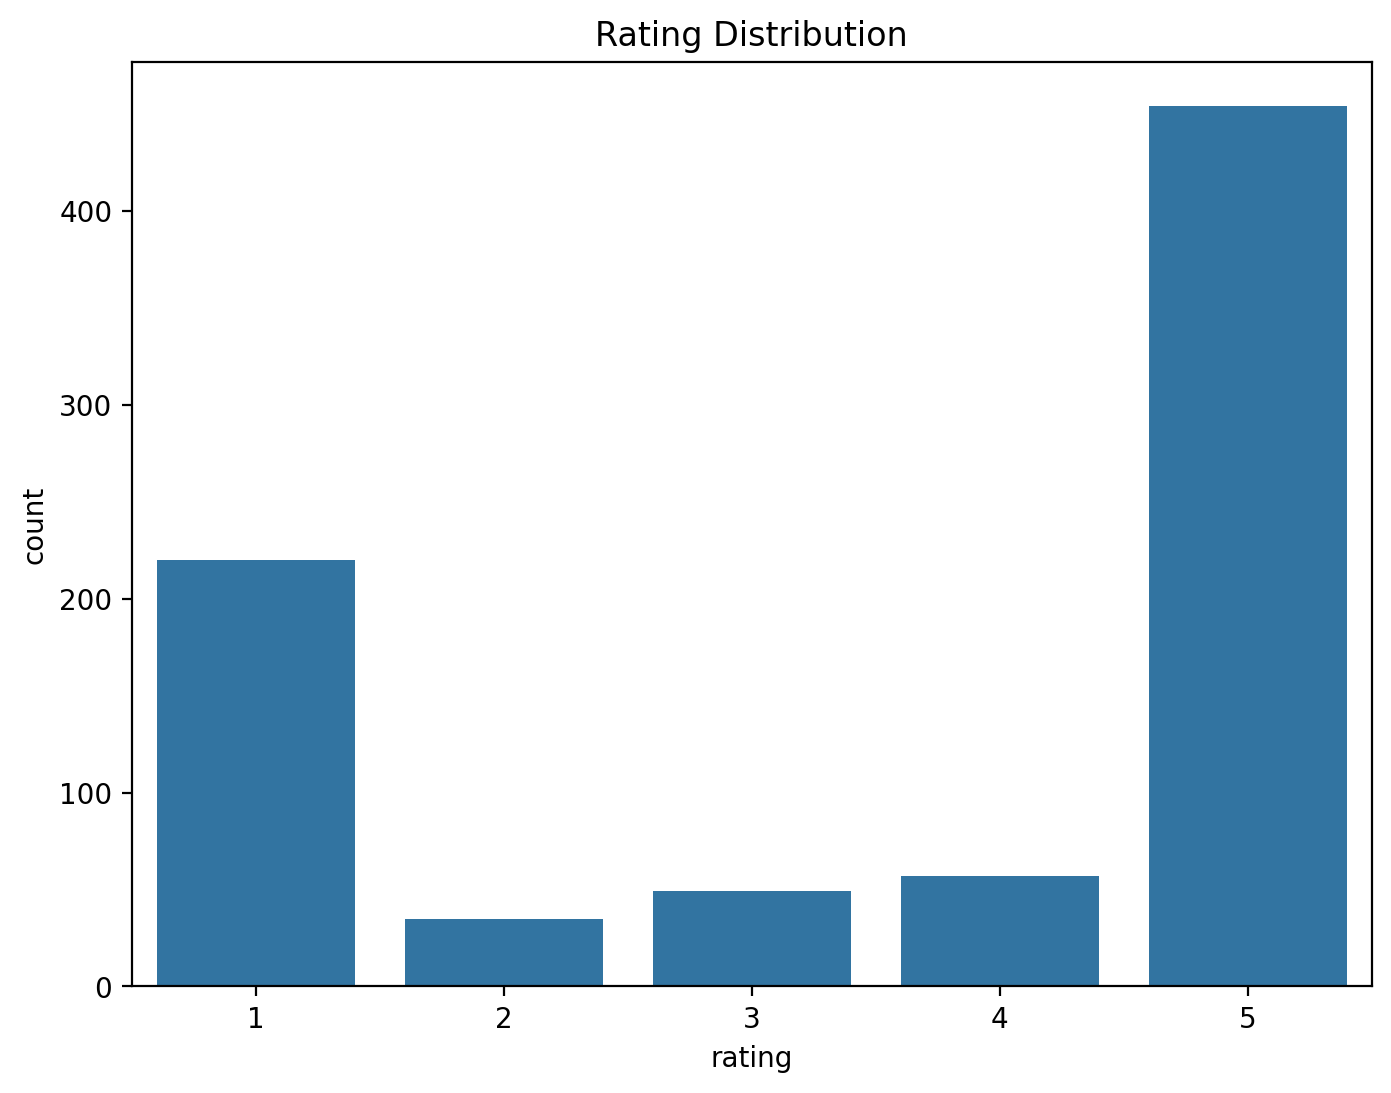

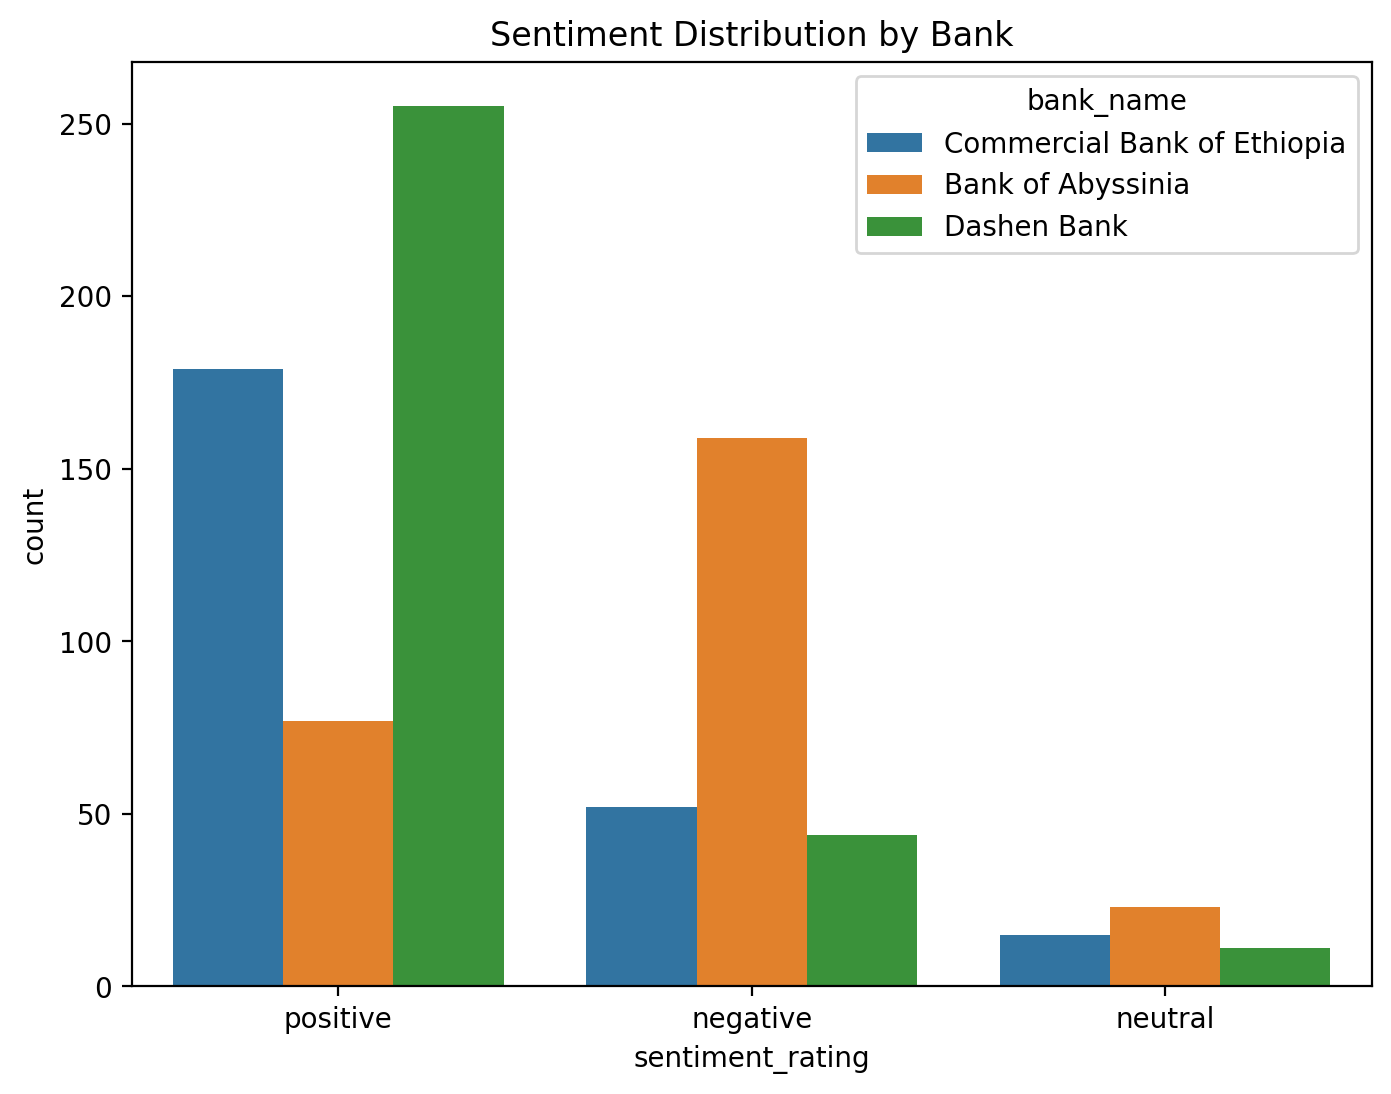

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

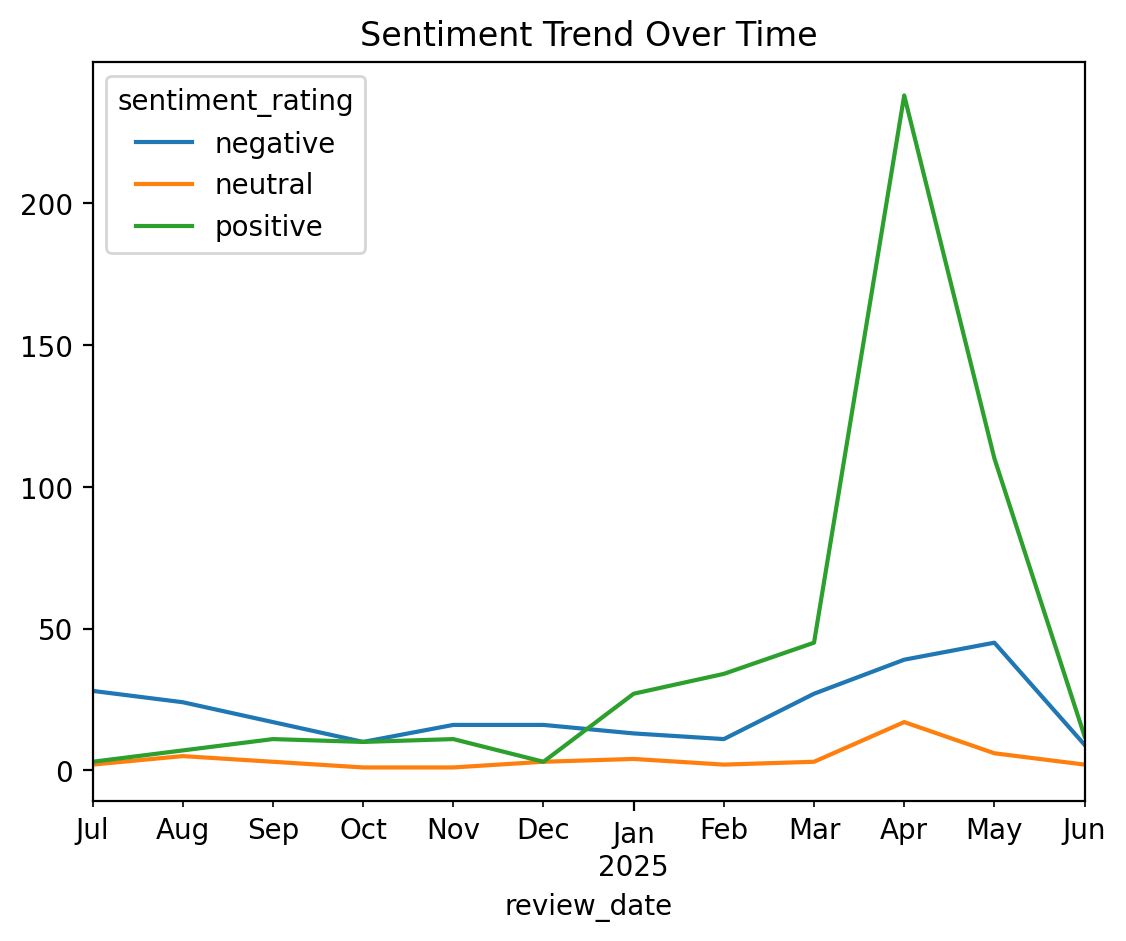

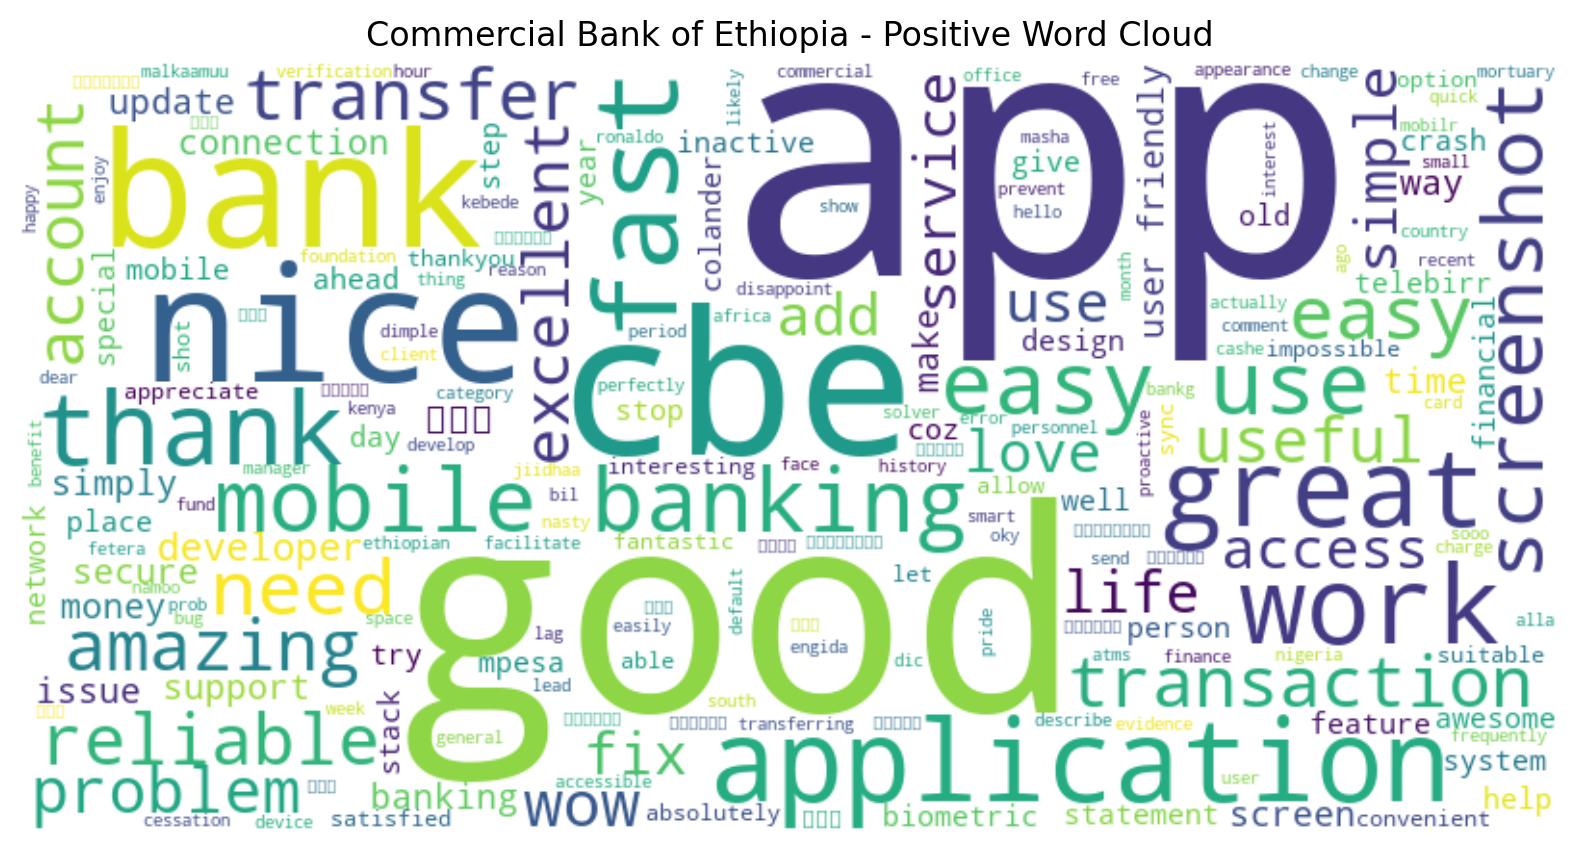

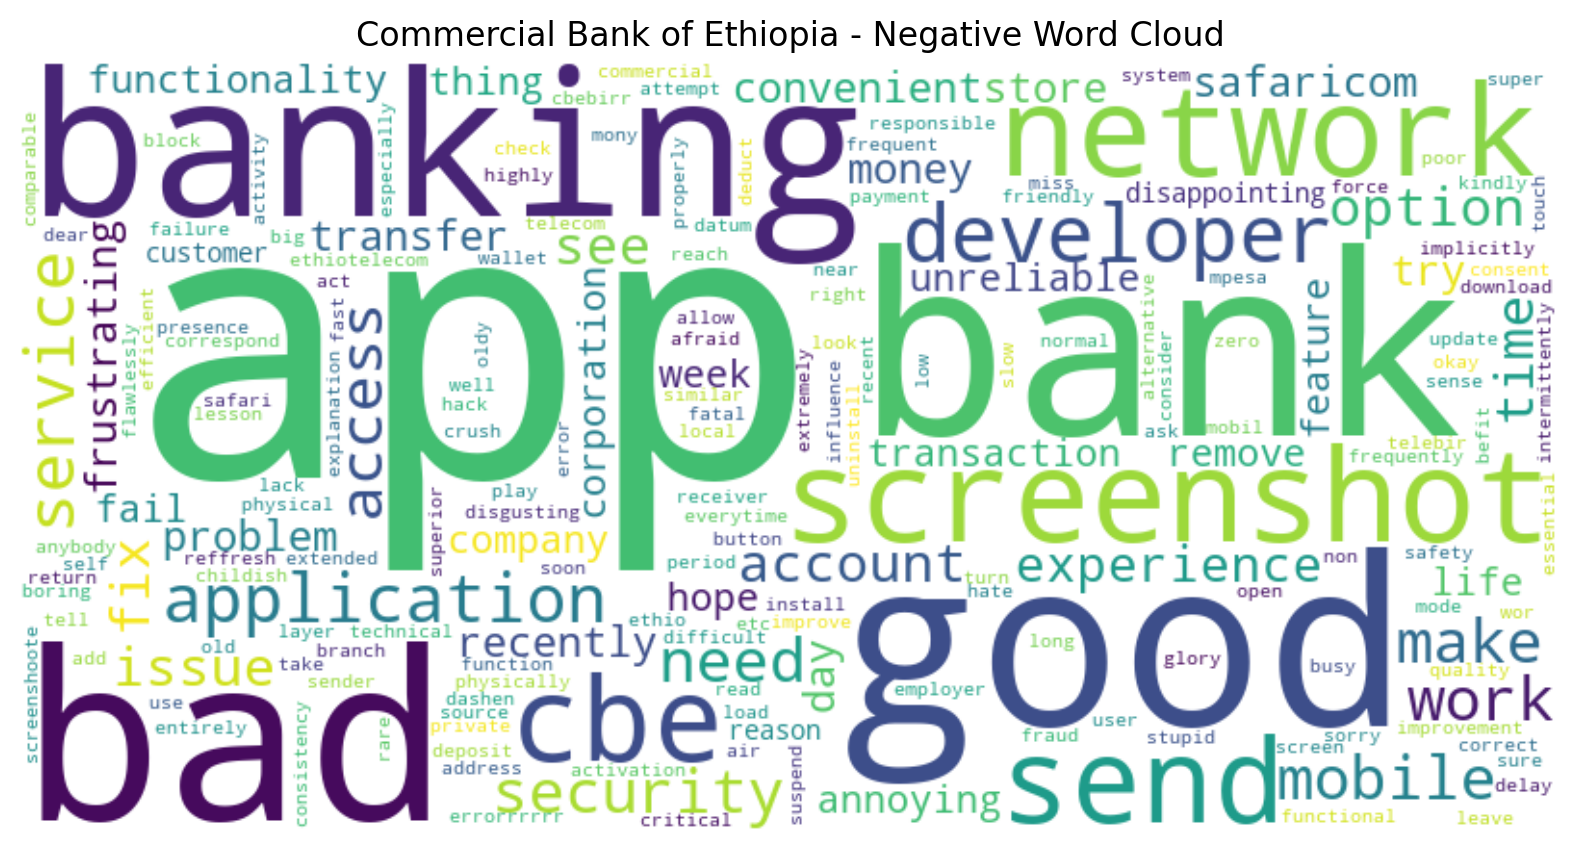

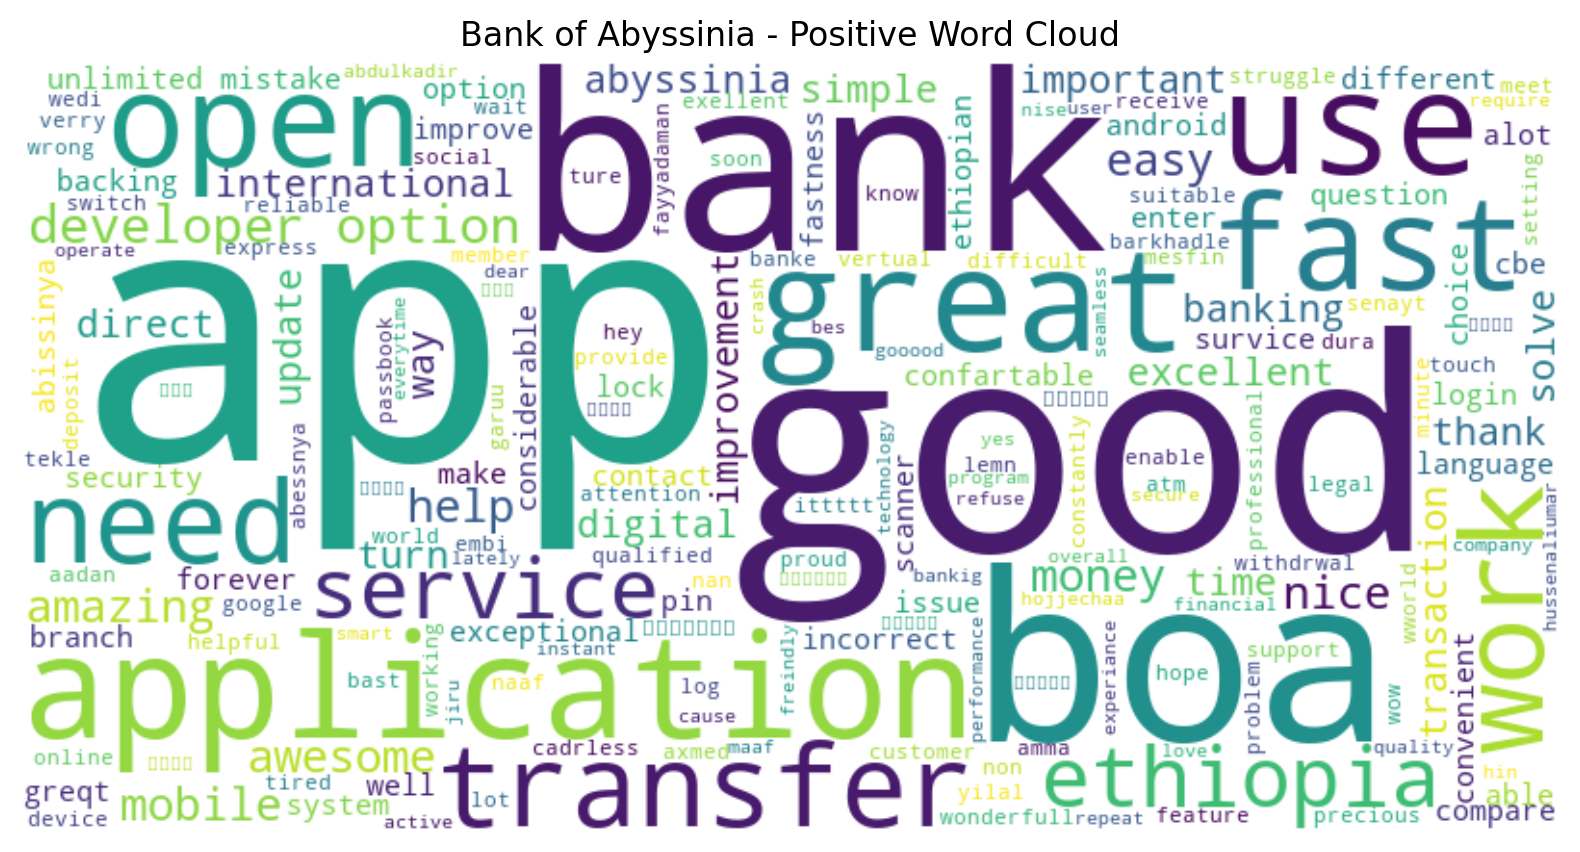

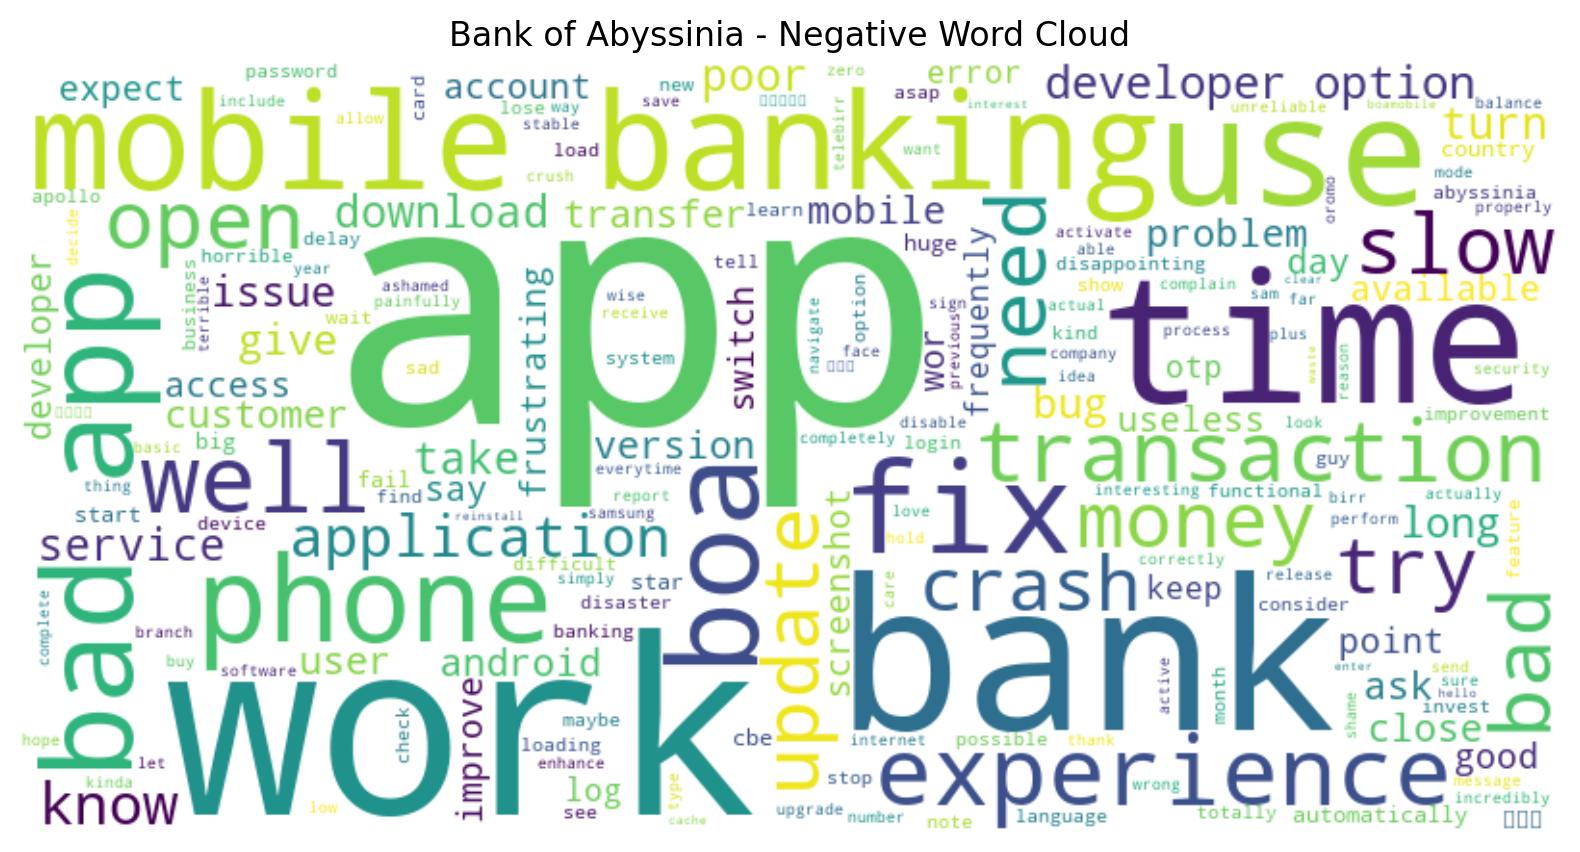

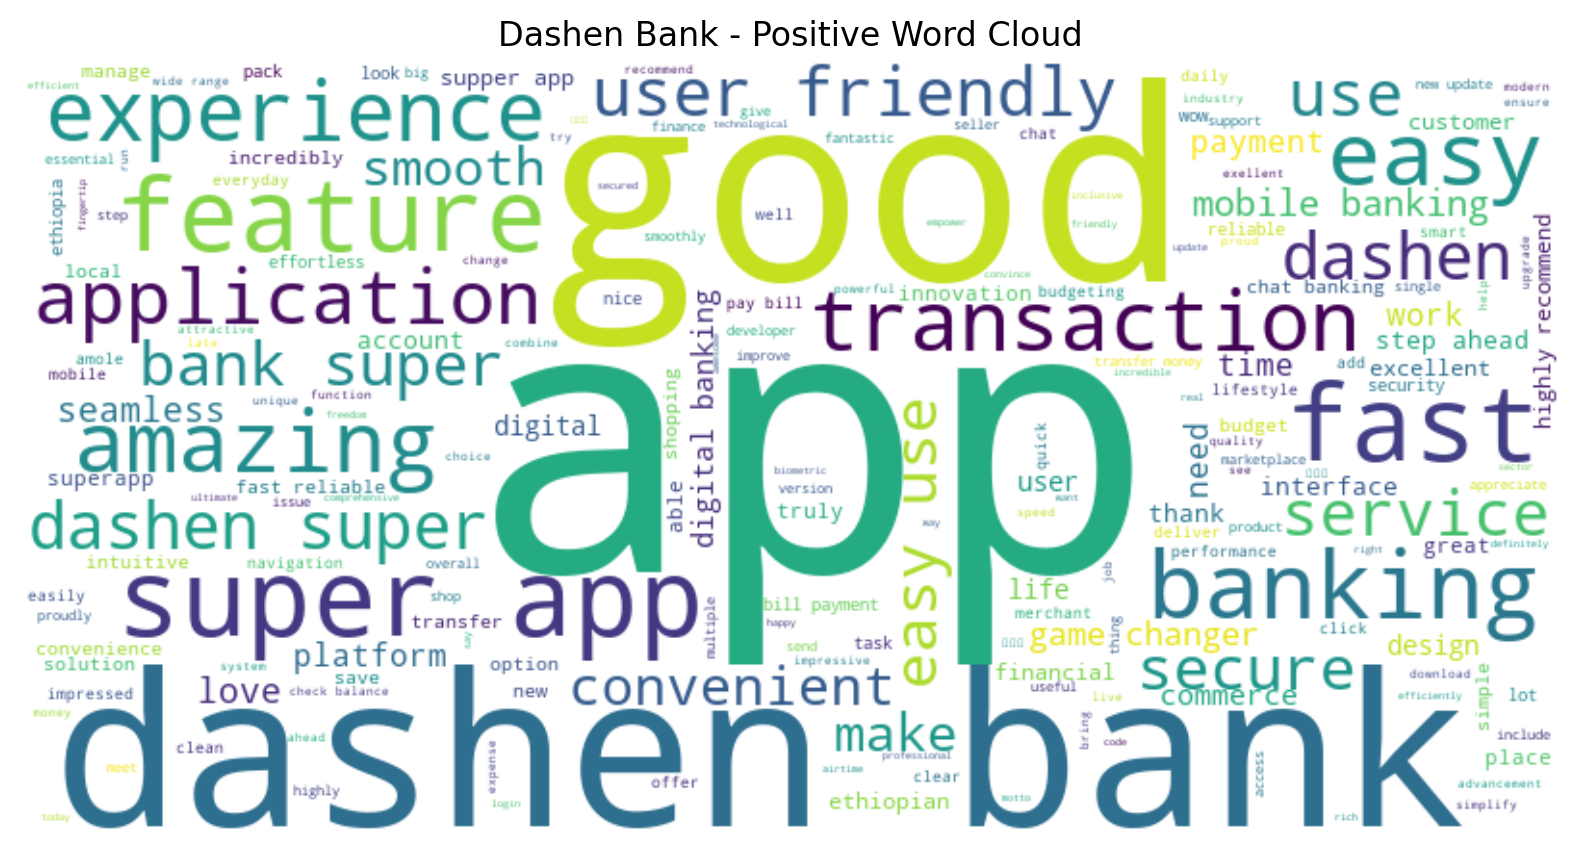

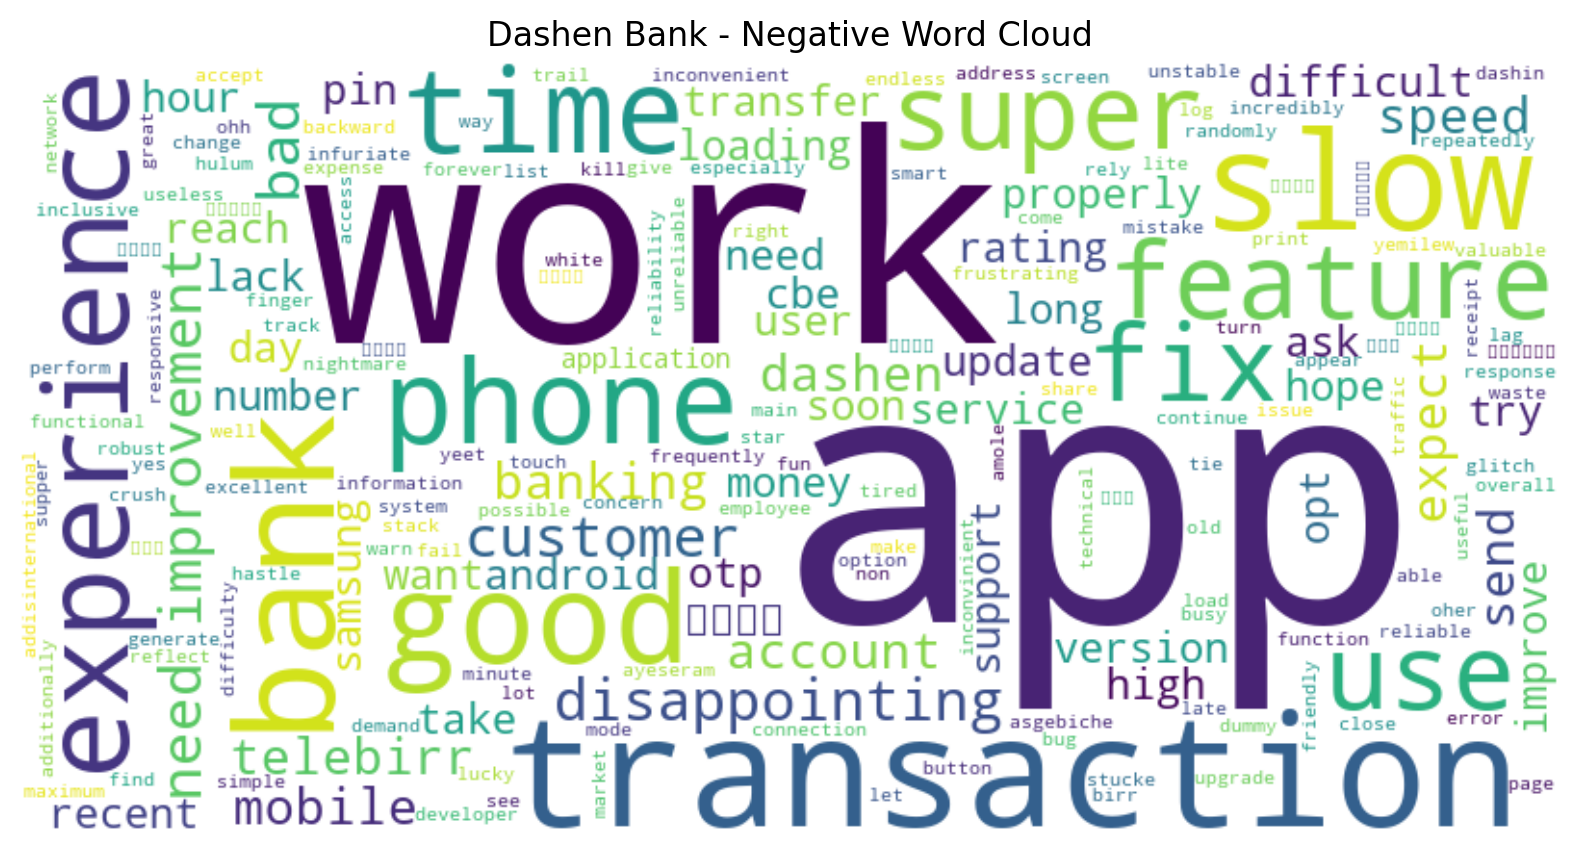

In [17]:
print("📊 Generating visualizations...")

# Rating Distribution
analyze_reviews_from_db.plot_rating_distribution(df)
if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='rating')
    plt.title("Rating Distribution")
    plt.show()
    plt.close()

# Sentiment Distribution
analyze_reviews_from_db.plot_sentiment_distribution(df)
if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sentiment_rating', hue='bank_name')
    plt.title("Sentiment Distribution by Bank")
    plt.show()
    plt.close()

# Sentiment Trend
analyze_reviews_from_db.plot_sentiment_trend(df)
if not df.empty:
    plt.figure(figsize=(10, 6))
    df.groupby([df['review_date'].dt.to_period('M'), 'sentiment_rating']).size().unstack().plot()
    plt.title("Sentiment Trend Over Time")
    plt.show()
    plt.close()

# Word Clouds
for bank in df['bank_name'].unique():
    for sentiment in ['positive', 'negative']:
        analyze_reviews_from_db.generate_wordcloud(df, bank, sentiment)
        if not df.empty:
            reviews = df[(df['bank_name'] == bank) & (df['sentiment_rating'] == sentiment)]['review'].dropna()
            if not reviews.empty:
                tokens = [word for review in reviews for word in analyze_reviews_from_db.clean_and_tokenize(review)]
                if tokens:
                    wordcloud = analyze_reviews_from_db.WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
                    plt.figure(figsize=(10, 5))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title(f"{bank} - {sentiment.capitalize()} Word Cloud")
                    plt.show()
                    plt.close()

##  Insights and Recommendations with Red Negative Words

In [21]:
print("🧠 Analyzing insights...")
insights = analyze_reviews_from_db.summarize_insights(df)

# Display insights with HTML styling
html_output = "<h3>📌 Key Drivers and Pain Points</h3>"
for bank, items in insights.items():
    drivers = ", ".join( word for word, _ in items['drivers'])
    pain_points = ", ".join(word for word, _ in items['pain_points'])
    html_output += f"""
    <div>
        <h4>🏦 {bank}</h4>
        <p>✅ Drivers: <span style='color:green'>{drivers}</span></p>
        <p>⚠️ Pain Points: <span style='color:red'>{pain_points}</span></p>
    </div>
    """
display(HTML(html_output))

print("\n💬 Recommendations:")
recommendations = analyze_reviews_from_db.suggest_improvements(insights)
for rec in recommendations:
    print(rec)

🧠 Analyzing insights...



💬 Recommendations:
✨ Commercial Bank of Ethiopia: Promote positive features like app, good, cbe in marketing.
✨ Bank of Abyssinia: Promote positive features like app, good, bank in marketing.
💡 Dashen Bank: Improve performance (e.g., address slow, lag, delay).
✨ Dashen Bank: Promote positive features like app, dashen, banking in marketing.


## Generate Final Report

In [15]:
print("\n📄 Generating report...")
analyze_reviews_from_db.generate_report(df, insights)
print("Report saved to outputs/report.pdf")


📄 Generating report...
Report saved to outputs/report.pdf
